# NETFLIX - DADOS ESTATÍSTICOS

*   David José Torres
*   Diógenes Ternero
*   Rafael Yukiharu Yamagawa
*   Ricardo Alexandre Dainese



### Importando Bibliotecas







In [1]:
import pandas as pd
import io
import os
import sys
import numpy
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from matplotlib import rcParams

### Set dataset

In [2]:
url_net_original = "https://raw.githubusercontent.com/YamagawaYukiharu/ProjetoFinal/main/NetflixOriginals.csv"
url_net_custos = "https://raw.githubusercontent.com/YamagawaYukiharu/ProjetoFinal/main/Netflix%20subscription%20fee%20Dec-2021.csv"
url_net_titulos = "https://raw.githubusercontent.com/YamagawaYukiharu/ProjetoFinal/main/netflix_titles.csv"
url_continentes = "https://raw.githubusercontent.com/dbouquin/IS_608/master/NanosatDB_munging/Countries-Continents.csv"
dataset_net_original = pd.read_csv(url_net_original, encoding="ISO-8859-1")
dataset_net_custos = pd.read_csv(url_net_custos, encoding="ISO-8859-1")
dataset_net_titulos = pd.read_csv(url_net_titulos, encoding="ISO-8859-1")
dataset_continentes = pd.read_csv(url_continentes)

# Método head()
Usado para retornar as primeiras linhas da base de dados.

In [3]:
dataset_net_original.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


In [4]:
dataset_net_custos.head()

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
0,ar,Argentina,4760,3154,1606,3.74,6.30,9.26
1,au,Australia,6114,4050,2064,7.84,12.12,16.39
2,at,Austria,5640,3779,1861,9.03,14.67,20.32
3,be,Belgium,4990,3374,1616,10.16,15.24,20.32
4,bo,Bolivia,4991,3155,1836,7.99,10.99,13.99


In [5]:
dataset_net_titulos.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


**Verificando duplicidade**

In [6]:
dataset_net_original.duplicated().sum()

0

In [7]:
dataset_net_custos.duplicated().sum()

0

In [8]:
dataset_net_titulos.duplicated().sum()

0

**Verificando campos com registros nulos.**

In [9]:
dataset_net_original.isnull().sum()

Title         0
Genre         0
Premiere      0
Runtime       0
IMDB Score    0
Language      0
dtype: int64

In [10]:
dataset_net_custos.isnull().sum()

Country_code                     0
Country                          0
Total Library Size               0
No. of TV Shows                  0
No. of Movies                    0
Cost Per Month - Basic ($)       0
Cost Per Month - Standard ($)    0
Cost Per Month - Premium ($)     0
dtype: int64

In [11]:
dataset_net_titulos.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

# Função nunique
Apresenta os valores distintos das colunas.

In [12]:
dataset_net_original.nunique()

Title         584
Genre         115
Premiere      390
Runtime       124
IMDB Score     54
Language       38
dtype: int64

In [13]:
dataset_net_custos.nunique()

Country_code                     65
Country                          65
Total Library Size               62
No. of TV Shows                  56
No. of Movies                    56
Cost Per Month - Basic ($)       35
Cost Per Month - Standard ($)    39
Cost Per Month - Premium ($)     40
dtype: int64

In [14]:
dataset_net_titulos.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

# Método info()
Apresenta o nome de cada coluna, o número de linhas por coluna e o tipo de dado de cada uma dessas colunas.

In [15]:
dataset_net_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


In [16]:
dataset_net_custos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country_code                   65 non-null     object 
 1   Country                        65 non-null     object 
 2   Total Library Size             65 non-null     int64  
 3   No. of TV Shows                65 non-null     int64  
 4   No. of Movies                  65 non-null     int64  
 5   Cost Per Month - Basic ($)     65 non-null     float64
 6   Cost Per Month - Standard ($)  65 non-null     float64
 7   Cost Per Month - Premium ($)   65 non-null     float64
dtypes: float64(3), int64(3), object(2)
memory usage: 4.2+ KB


In [17]:
dataset_net_titulos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


# Função describre()
Apresenta as estatísticas descritivas, como média, desvio padrão, máximo, mínimo e outras tendências centrais, além da forma da distribuição.

In [18]:
dataset_net_original.describe()

,Runtime,IMDB Score
count,584.000000,584.000000
mean,93.577055,6.271747
std,27.761683,0.979256
min,4.000000,2.500000
25%,86.000000,5.700000
50%,97.000000,6.350000
75%,108.000000,7.000000
max,209.000000,9.000000


In [19]:
dataset_net_custos.describe()

,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000
mean,5314.415385,3518.953846,1795.461538,8.368462,11.990000,15.612923
std,980.322633,723.010556,327.279748,1.937819,2.863979,4.040672
min,2274.000000,1675.000000,373.000000,1.970000,3.000000,4.020000
25%,4948.000000,3154.000000,1628.000000,7.990000,10.710000,13.540000
50%,5195.000000,3512.000000,1841.000000,8.990000,11.490000,14.450000
75%,5952.000000,3832.000000,1980.000000,9.030000,13.540000,18.060000
max,7325.000000,5234.000000,2387.000000,12.880000,20.460000,26.960000


In [20]:
dataset_net_titulos.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


# Função shape
Apresenta o número de linhas e colunas.

In [21]:
dataset_net_original.shape

(584, 6)

In [22]:
dataset_net_custos.shape

(65, 8)

In [23]:
dataset_net_titulos.shape

(8807, 12)

**Transport índice e coluna**. 

In [24]:
dataset_net_original.head().T

,0,1,2,3,4
Title,Enter the Anime,Dark Forces,The App,The Open House,Kaali Khuhi
Genre,Documentary,Thriller,Science fiction/Drama,Horror thriller,Mystery
Premiere,"August 5, 2019","August 21, 2020","December 26, 2019","January 19, 2018","October 30, 2020"
Runtime,58,81,79,94,90
IMDB Score,2.5,2.6,2.6,3.2,3.4
Language,English/Japanese,Spanish,Italian,English,Hindi


In [25]:
dataset_net_custos.head().T

,0,1,2,3,4
Country_code,ar,au,at,be,bo
Country,Argentina,Australia,Austria,Belgium,Bolivia
Total Library Size,4760,6114,5640,4990,4991
No. of TV Shows,3154,4050,3779,3374,3155
No. of Movies,1606,2064,1861,1616,1836
Cost Per Month - Basic ($),3.74,7.84,9.03,10.16,7.99
Cost Per Month - Standard ($),6.3,12.12,14.67,15.24,10.99
Cost Per Month - Premium ($),9.26,16.39,20.32,20.32,13.99


In [26]:
dataset_net_titulos.head().T

,0,1,2,3,4
show_id,s1,s2,s3,s4,s5
type,Movie,TV Show,TV Show,TV Show,TV Show
title,Dick Johnson Is Dead,Blood & Water,Ganglands,Jailbirds New Orleans,Kota Factory
director,Kirsten Johnson,NaN,Julien Leclercq,NaN,NaN
cast,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...","Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K..."
country,United States,South Africa,NaN,NaN,India
date_added,"September 25, 2021","September 24, 2021","September 24, 2021","September 24, 2021","September 24, 2021"
release_year,2020,2021,2021,2021,2021
rating,PG-13,TV-MA,TV-MA,TV-MA,TV-MA
duration,90 min,2 Seasons,1 Season,1 Season,2 Seasons


**Transforma campo "PREMIERE" para data.**

In [27]:
dataset_net_original['Premiere'] = pd.to_datetime(dataset_net_original['Premiere'])

In [28]:
dataset_net_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Title       584 non-null    object        
 1   Genre       584 non-null    object        
 2   Premiere    584 non-null    datetime64[ns]
 3   Runtime     584 non-null    int64         
 4   IMDB Score  584 non-null    float64       
 5   Language    584 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 27.5+ KB


In [29]:
dataset_net_original.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish
2,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian
3,The Open House,Horror thriller,2018-01-19,94,3.2,English
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi


**Transforma o campo "DATE_ADDED" para data.**

In [30]:
dataset_net_titulos['date_added'] = pd.to_datetime(dataset_net_titulos['date_added'])

In [31]:
dataset_net_titulos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


In [32]:
dataset_net_titulos.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


**Transforma o campo "CAST" para o formato de lista.**

In [33]:
dataset_net_titulos['cast'] = dataset_net_titulos['cast'].str.split(pat=",")

In [34]:
dataset_net_titulos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


In [35]:
dataset_net_titulos.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Th...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, ...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"[Mayur More, Jitendra Kumar, Ranjan Raj, Al...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [36]:
dataset_net_titulos['cast'][1][2]

' Gail Mabalane'

**Transforma o campo "listed_in" para o formato de lista.**

In [37]:
dataset_net_titulos['listed_in'] = dataset_net_titulos['listed_in'].str.split(pat=',')

In [38]:
dataset_net_titulos.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,[Documentaries],"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Th...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Myste...","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, ...",NaN,2021-09-24,2021,TV-MA,1 Season,"[Crime TV Shows, International TV Shows, TV ...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"[Docuseries, Reality TV]","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"[Mayur More, Jitendra Kumar, Ranjan Raj, Al...",India,2021-09-24,2021,TV-MA,2 Seasons,"[International TV Shows, Romantic TV Shows, ...",In a city of coaching centers known to train I...


In [39]:
dataset_net_titulos['listed_in'][1][2]

' TV Mysteries'

**Transforma o campo "COUNTRY" para o formato de lista.**

In [40]:
dataset_net_titulos['country'] = dataset_net_titulos['country'].str.split(',')

In [41]:
dataset_net_titulos.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,[United States],2021-09-25,2020,PG-13,90 min,[Documentaries],"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Th...",[South Africa],2021-09-24,2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Myste...","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, ...",NaN,2021-09-24,2021,TV-MA,1 Season,"[Crime TV Shows, International TV Shows, TV ...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"[Docuseries, Reality TV]","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"[Mayur More, Jitendra Kumar, Ranjan Raj, Al...",[India],2021-09-24,2021,TV-MA,2 Seasons,"[International TV Shows, Romantic TV Shows, ...",In a city of coaching centers known to train I...


**Transforma o campo "DIRECTOR" para o formato de lista.**

In [42]:
dataset_net_titulos['director'] = dataset_net_titulos['director'].str.split(',')

In [43]:
dataset_net_titulos.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,[Kirsten Johnson],NaN,[United States],2021-09-25,2020,PG-13,90 min,[Documentaries],"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Th...",[South Africa],2021-09-24,2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Myste...","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,[Julien Leclercq],"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, ...",NaN,2021-09-24,2021,TV-MA,1 Season,"[Crime TV Shows, International TV Shows, TV ...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"[Docuseries, Reality TV]","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"[Mayur More, Jitendra Kumar, Ranjan Raj, Al...",[India],2021-09-24,2021,TV-MA,2 Seasons,"[International TV Shows, Romantic TV Shows, ...",In a city of coaching centers known to train I...


**Criando coluna "COUNT_DIRECTOR" e usando a função str.len(), que retorna um inteiro que é o comprimento do string, o número de caracteres do string.**

In [44]:
dataset_net_titulos['count_director'] = dataset_net_titulos['director'].str.len()

In [45]:
dataset_net_titulos.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,count_director
0,s1,Movie,Dick Johnson Is Dead,[Kirsten Johnson],NaN,[United States],2021-09-25,2020,PG-13,90 min,[Documentaries],"As her father nears the end of his life, filmm...",1.0
1,s2,TV Show,Blood & Water,NaN,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Th...",[South Africa],2021-09-24,2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Myste...","After crossing paths at a party, a Cape Town t...",NaN
2,s3,TV Show,Ganglands,[Julien Leclercq],"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, ...",NaN,2021-09-24,2021,TV-MA,1 Season,"[Crime TV Shows, International TV Shows, TV ...",To protect his family from a powerful drug lor...,1.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"[Docuseries, Reality TV]","Feuds, flirtations and toilet talk go down amo...",NaN
4,s5,TV Show,Kota Factory,NaN,"[Mayur More, Jitendra Kumar, Ranjan Raj, Al...",[India],2021-09-24,2021,TV-MA,2 Seasons,"[International TV Shows, Romantic TV Shows, ...",In a city of coaching centers known to train I...,NaN


In [46]:
dataset_net_titulos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   show_id         8807 non-null   object        
 1   type            8807 non-null   object        
 2   title           8807 non-null   object        
 3   director        6173 non-null   object        
 4   cast            7982 non-null   object        
 5   country         7976 non-null   object        
 6   date_added      8797 non-null   datetime64[ns]
 7   release_year    8807 non-null   int64         
 8   rating          8803 non-null   object        
 9   duration        8804 non-null   object        
 10  listed_in       8807 non-null   object        
 11  description     8807 non-null   object        
 12  count_director  6173 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(10)
memory usage: 894.6+ KB


**Ordenando elementos com o SORT(), no caso de acordo com a coluna "COUNT_DIRECTOR", apresentando do maior para o menor.**

In [47]:
dataset_net_titulos.sort_values(by=['count_director'], ascending=False)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,count_director
5887,s5888,Movie,Walt Disney Animation Studios Short Films Coll...,"[Chris Buck, Jennifer Lee, Patrick Osborne, ...","[Kristen Bell, Josh Gad, Jonathan Groff, Id...",[United States],2015-10-25,2015,TV-Y,90 min,[Children & Family Movies],This collection of 12 short films from Disney ...,13.0
6910,s6911,Movie,HALO Legends,"[Shinji Aramaki, Mamoru Oshii, Hideki Futamu...","[Andy McAvin, James Faulkner, Luci Christian...","[United States, Japan]",2017-05-01,2009,PG-13,117 min,"[Action & Adventure, Anime Features, Sci-Fi ...",This anthology features seven independent anim...,12.0
7515,s7516,Movie,Movie 43,"[Peter Farrelly, Will Graham, Steve Carr, G...","[Greg Kinnear, Dennis Quaid, Common, Seth M...",[United States],2019-04-09,2013,R,94 min,[Comedies],An eye-popping cast stars in this sketch-comed...,12.0
5837,s5838,Movie,X: Past Is Present,"[Hemant Gaba, Pratim D. Gupta, Sudhish Kamat...","[Anshuman Jha, Rajat Kapoor, Pooja Ruparel, ...",[India],2016-07-01,2015,TV-MA,105 min,"[Dramas, Independent Movies, International M...",When a middle-aged filmmaker meets an alluring...,11.0
3124,s3125,Movie,"Sincerely Yours, Dhaka","[Nuhash Humayun, Syed Ahmed Shawki, Rahat Ra...","[Mostafizur Noor Imran, Orchita Sporshia, Al...",[Bangladesh],2019-12-16,2018,TV-MA,136 min,"[Comedies, Dramas, Independent Movies]",Eleven emerging Bangladeshi filmmakers present...,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,NaN,"[Mike Liscio, Emily Bauer, Billy Bob Thompso...","[Japan, Canada]",2018-05-01,2015,TV-Y7,2 Seasons,"[Anime Series, Kids' TV]",Now that he's discovered the Pendulum Summonin...,NaN
8796,s8797,TV Show,Yunus Emre,NaN,"[GÃ¶khan Atalay, Payidar TÃ¼fekÃ§ioglu, Bara...",[Turkey],2017-01-17,2016,TV-PG,2 Seasons,"[International TV Shows, TV Dramas]","During the Mongol invasions, Yunus Emre leaves...",NaN
8797,s8798,TV Show,Zak Storm,NaN,"[Michael Johnston, Jessica Gee-George, Chris...","[United States, France, South Korea, Indone...",2018-09-13,2016,TV-Y7,3 Seasons,[Kids' TV],Teen surfer Zak Storm is mysteriously transpor...,NaN
8800,s8801,TV Show,Zindagi Gulzar Hai,NaN,"[Sanam Saeed, Fawad Khan, Ayesha Omer, Mehr...",[Pakistan],2016-12-15,2012,TV-PG,1 Season,"[International TV Shows, Romantic TV Shows, ...","Strong-willed, middle-class Kashaf and carefre...",NaN


## Análise dos dados

**Tipo de segmento (Movie/TV Show) - total geral**

In [48]:
fig = px.pie(dataset_net_titulos['type'].value_counts().reset_index(), values='type', names='index', title="Total Geral")
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

**Tipo de segmento (Movie/TV Show) - anos anteriores (< 2020)**

In [49]:
dataset_net_titulos_anos_anteriores = dataset_net_titulos[dataset_net_titulos['date_added'].dt.year < 2020]

In [50]:
fig = px.pie(dataset_net_titulos_anos_anteriores['type'].value_counts().reset_index(), values='type', names='index')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

**Tipo de segmento (Movie/TV Show) - anos recentes (2020-2021)**

In [51]:
dataset_net_titulos_anos_recentes = dataset_net_titulos[dataset_net_titulos['date_added'].dt.year >= 2020]

In [52]:
fig = px.pie(dataset_net_titulos_anos_recentes['type'].value_counts().reset_index(), values='type', names='index')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

**Quantidade de filmes adicionados no catálogo por ano**

In [53]:
dataset_net_titulos.update(dataset_net_titulos['date_added'].fillna(pd.Timestamp('19000101'), inplace = True))

In [54]:
dataset_net_titulos['date_added'] = pd.to_datetime(dataset_net_titulos['date_added'])

In [55]:
y=dataset_net_titulos["date_added"].dt.year.value_counts().rename_axis('year').reset_index(name='counts').sort_values('year', ascending=False)
y[0:10]

,year,counts
3,2021,1498
1,2020,1879
0,2019,2016
2,2018,1649
4,2017,1188
5,2016,429
6,2015,82
7,2014,24
9,2013,11
11,2012,3


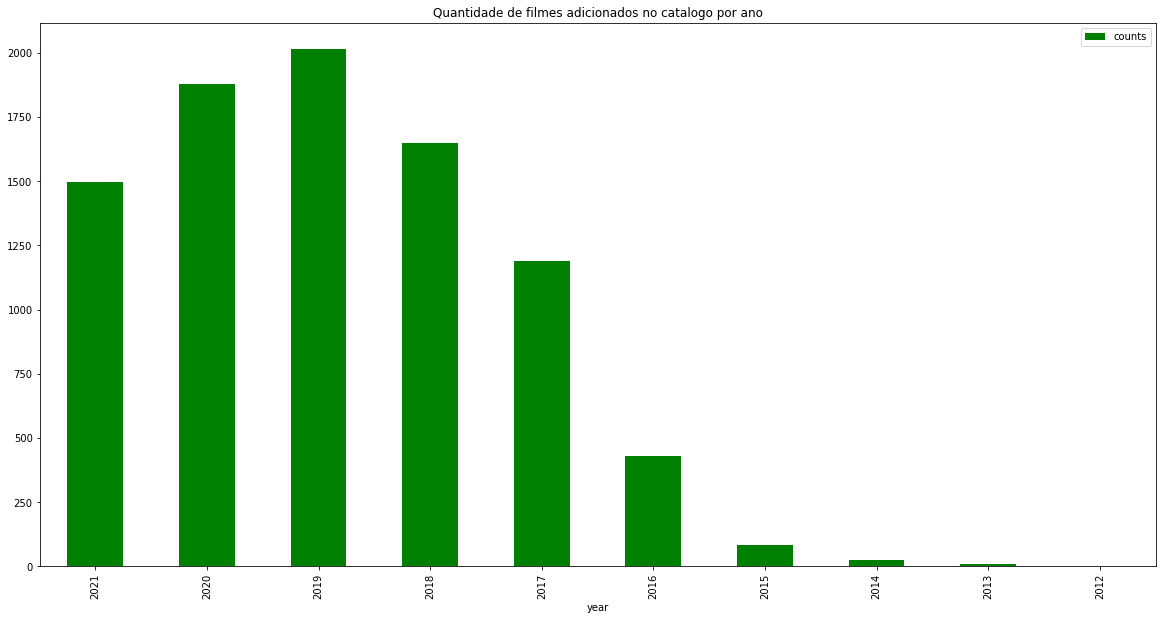

In [56]:
y[0:10].plot(kind="bar",title="Quantidade de filmes adicionados no catalogo por ano",figsize=(20,10),color="green",x="year", y="counts")

**Quantidade de filmes produzidos por ano - Originais Netflix**

In [57]:
y=dataset_net_original['Premiere'].dt.year.value_counts().rename_axis('year').reset_index(name='counts').sort_values('year', ascending=False)
y[0:10]

,year,counts
3,2021,71
0,2020,183
1,2019,125
2,2018,99
4,2017,66
5,2016,30
6,2015,9
7,2014,1


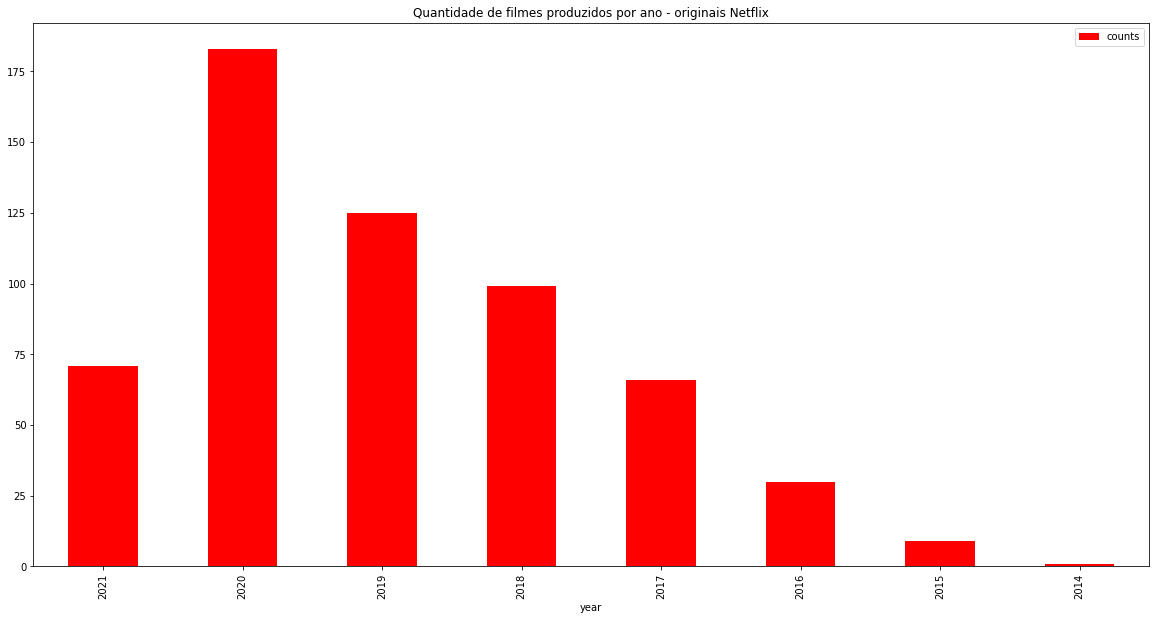

In [58]:
y[0:30].plot(kind="bar",title="Quantidade de filmes produzidos por ano - originais Netflix",figsize=(20,10),color="red",x="year",y="counts")

**Produções por país.**

In [59]:
X=dataset_net_titulos['country'].value_counts().loc[lambda x : x>100].rename_axis('country').reset_index(name='counts')
X[0:10]

,country,counts
0,[United States],2818
1,[India],972
2,[United Kingdom],419
3,[Japan],245
4,[South Korea],199
5,[Canada],181
6,[Spain],145
7,[France],124
8,[Mexico],110
9,[Egypt],106


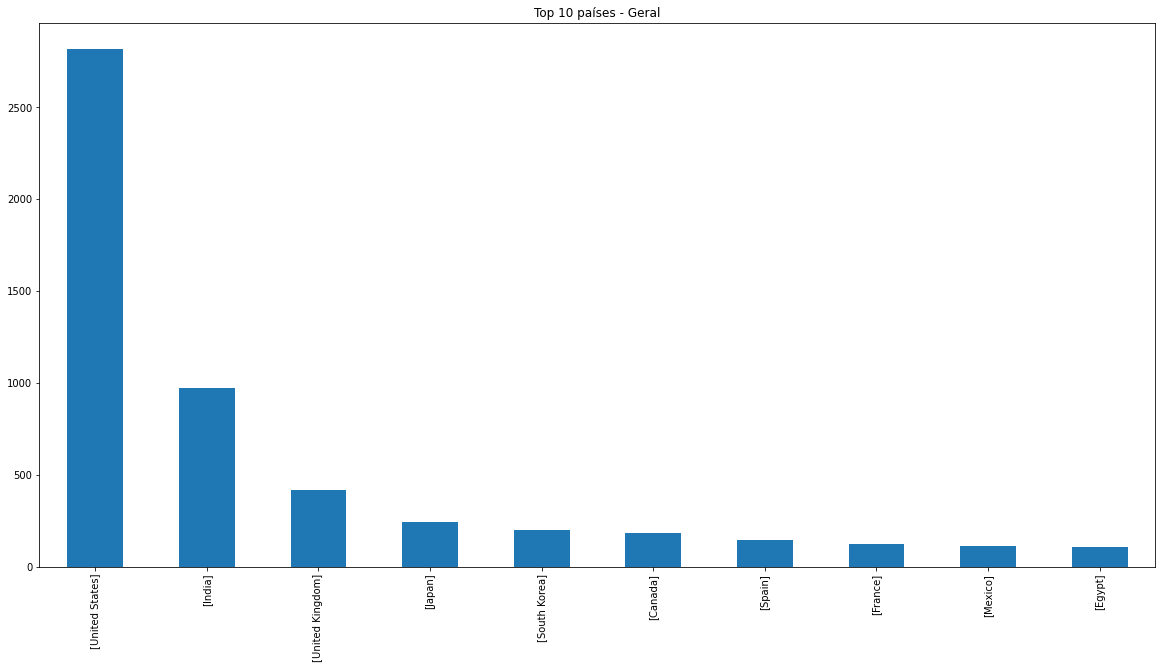

In [60]:
dataset_net_titulos['country'].value_counts()[0:10].plot(title='Top 10 países - Geral', kind='bar', figsize=(20,10))

**Gênero - Produções Originais da Netflix**

In [61]:
y=dataset_net_original['Genre'].value_counts()
y[0:10]

Documentary        159
Drama               77
Comedy              49
Romantic comedy     39
Thriller            33
Comedy-drama        14
Crime drama         11
Biopic               9
Horror               9
Action               7
Name: Genre, dtype: int64

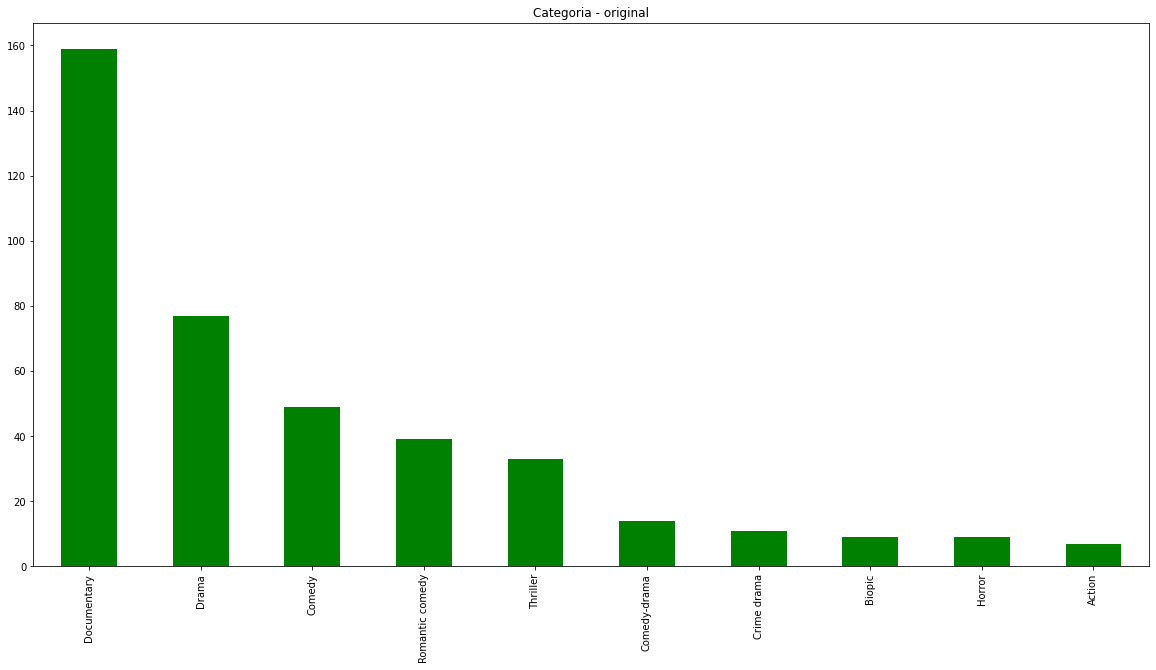

In [62]:
y[0:10].plot(kind="bar",title="Categoria - original",figsize=(20,10),color="green")

**Gênero - Títulos gerais**

In [63]:
exp = dataset_net_titulos.explode('listed_in').value_counts('listed_in')
exp[0:5]

listed_in
 International Movies    2624
Dramas                   1600
Comedies                 1210
Action & Adventure        859
Documentaries             829
dtype: int64

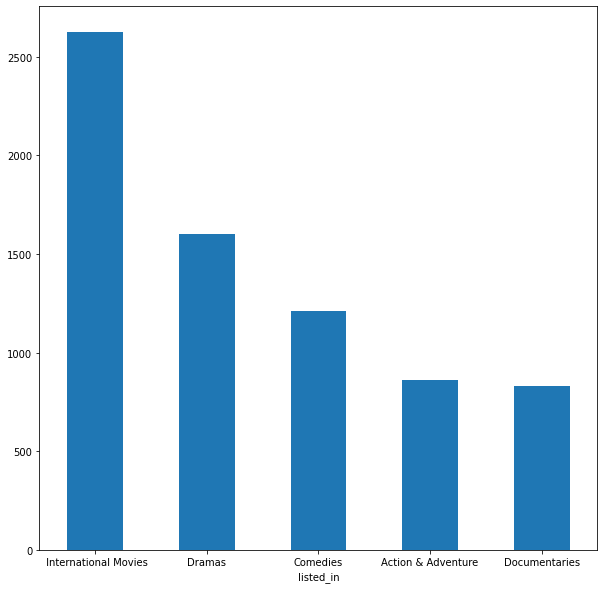

In [64]:
exp1 = exp[0:5]
ax = exp1.plot.bar(x='listed_in',  rot=0,figsize=(10,10))

**Notas do IMDb por gênero das produções originais da Netflix.**

Criando o Top 10 gêneros com mais produções originais da Netflix.

In [65]:
df_genero = dataset_net_original.groupby(["Genre"])["Title"].count().reset_index().sort_values('Title', ascending=False)[0:10]
df_genero

,Genre,Title
45,Documentary,159
46,Drama,77
32,Comedy,49
81,Romantic comedy,39
106,Thriller,33
36,Comedy-drama,14
41,Crime drama,11
26,Biopic,9
60,Horror,9
0,Action,7


In [66]:
dataset_net_original["conditional"] = dataset_net_original["Genre"].isin(df_genero["Genre"])

In [67]:
dataset_net_original

,Title,Genre,Premiere,Runtime,IMDB Score,Language,conditional
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese,True
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish,True
2,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian,False
3,The Open House,Horror thriller,2018-01-19,94,3.2,English,False
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi,False
...,...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,2018-12-31,125,8.4,English,False
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,2015-10-09,91,8.4,English/Ukranian/Russian,True
581,Springsteen on Broadway,One-man show,2018-12-16,153,8.5,English,False
582,Emicida: AmarElo - It's All For Yesterday,Documentary,2020-12-08,89,8.6,Portuguese,True


In [68]:
df_original_top_10_generos = dataset_net_original[dataset_net_original["conditional"] == True]

In [69]:
df_original_top_10_generos

,Title,Genre,Premiere,Runtime,IMDB Score,Language,conditional
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese,True
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish,True
5,Drive,Action,2019-11-01,147,3.5,Hindi,True
6,Leyla Everlasting,Comedy,2020-12-04,112,3.7,Turkish,True
9,Sardar Ka Grandson,Comedy,2021-05-18,139,4.1,Hindi,True
...,...,...,...,...,...,...,...
576,Cuba and the Cameraman,Documentary,2017-11-24,114,8.3,English,True
577,Dancing with the Birds,Documentary,2019-10-23,51,8.3,English,True
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,2015-10-09,91,8.4,English/Ukranian/Russian,True
582,Emicida: AmarElo - It's All For Yesterday,Documentary,2020-12-08,89,8.6,Portuguese,True


**Notas do IMDb por gênero das produções originais da Netflix.**

Descobrindo a média de cada um dos gêneros do Top 10 e plotando em um gráfico.

In [70]:
top_max = df_original_top_10_generos.groupby("Genre")["IMDB Score"].mean().nlargest(10)
top_max

Genre
Documentary        6.936478
Crime drama        6.745455
Biopic             6.400000
Drama              6.342857
Comedy-drama       6.214286
Romantic comedy    5.848718
Thriller           5.563636
Comedy             5.506122
Action             5.414286
Horror             5.255556
Name: IMDB Score, dtype: float64

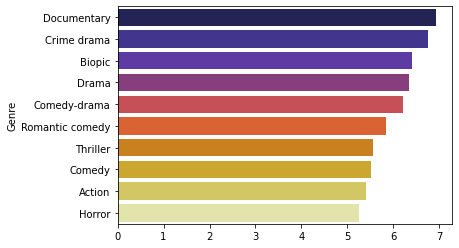

In [71]:
sns.barplot(x=top_max.values, y=top_max.index,palette="CMRmap")
rcParams['figure.figsize'] = 10,5


**Relaçãoo Média de nota x Quantidade de produções (por gênero)**

In [72]:
df_relacao_nota_quantidade = pd.merge(df_genero, top_max.reset_index(), how = 'inner', on = 'Genre')
df_relacao_nota_quantidade

,Genre,Title,IMDB Score
0,Documentary,159,6.936478
1,Drama,77,6.342857
2,Comedy,49,5.506122
3,Romantic comedy,39,5.848718
4,Thriller,33,5.563636
5,Comedy-drama,14,6.214286
6,Crime drama,11,6.745455
7,Biopic,9,6.400000
8,Horror,9,5.255556
9,Action,7,5.414286


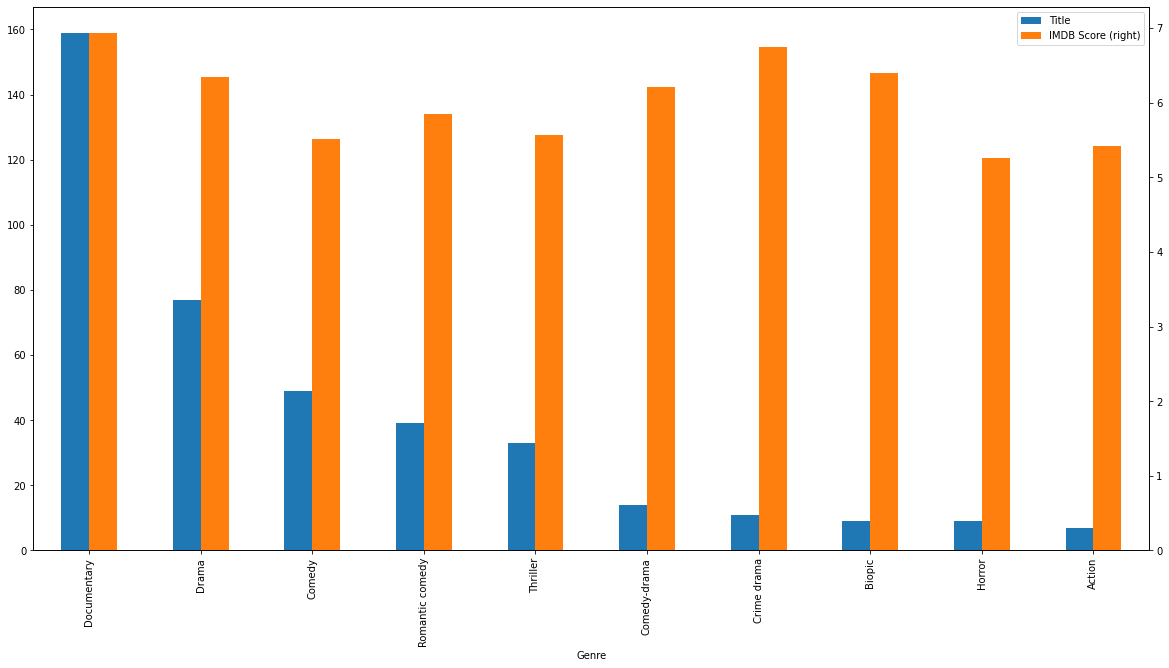

In [73]:
df_relacao_nota_quantidade.plot(x="Genre", y=["Title","IMDB Score"], secondary_y="IMDB Score", kind="bar",figsize=(20,10))

**Custos por assinatura (Basic, Standard, Premium)**

In [74]:
df_custos_continente = pd.merge(dataset_net_custos, dataset_continentes, how = 'inner', on = 'Country')
df_custos_continente.head()

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),Continent
0,ar,Argentina,4760,3154,1606,3.74,6.30,9.26,South America
1,au,Australia,6114,4050,2064,7.84,12.12,16.39,Oceania
2,at,Austria,5640,3779,1861,9.03,14.67,20.32,Europe
3,be,Belgium,4990,3374,1616,10.16,15.24,20.32,Europe
4,bo,Bolivia,4991,3155,1836,7.99,10.99,13.99,South America


**Custo mês por país - Assinatura Basic**

Text(0, 0.5, 'Cost Per Month - Basic (US$)')

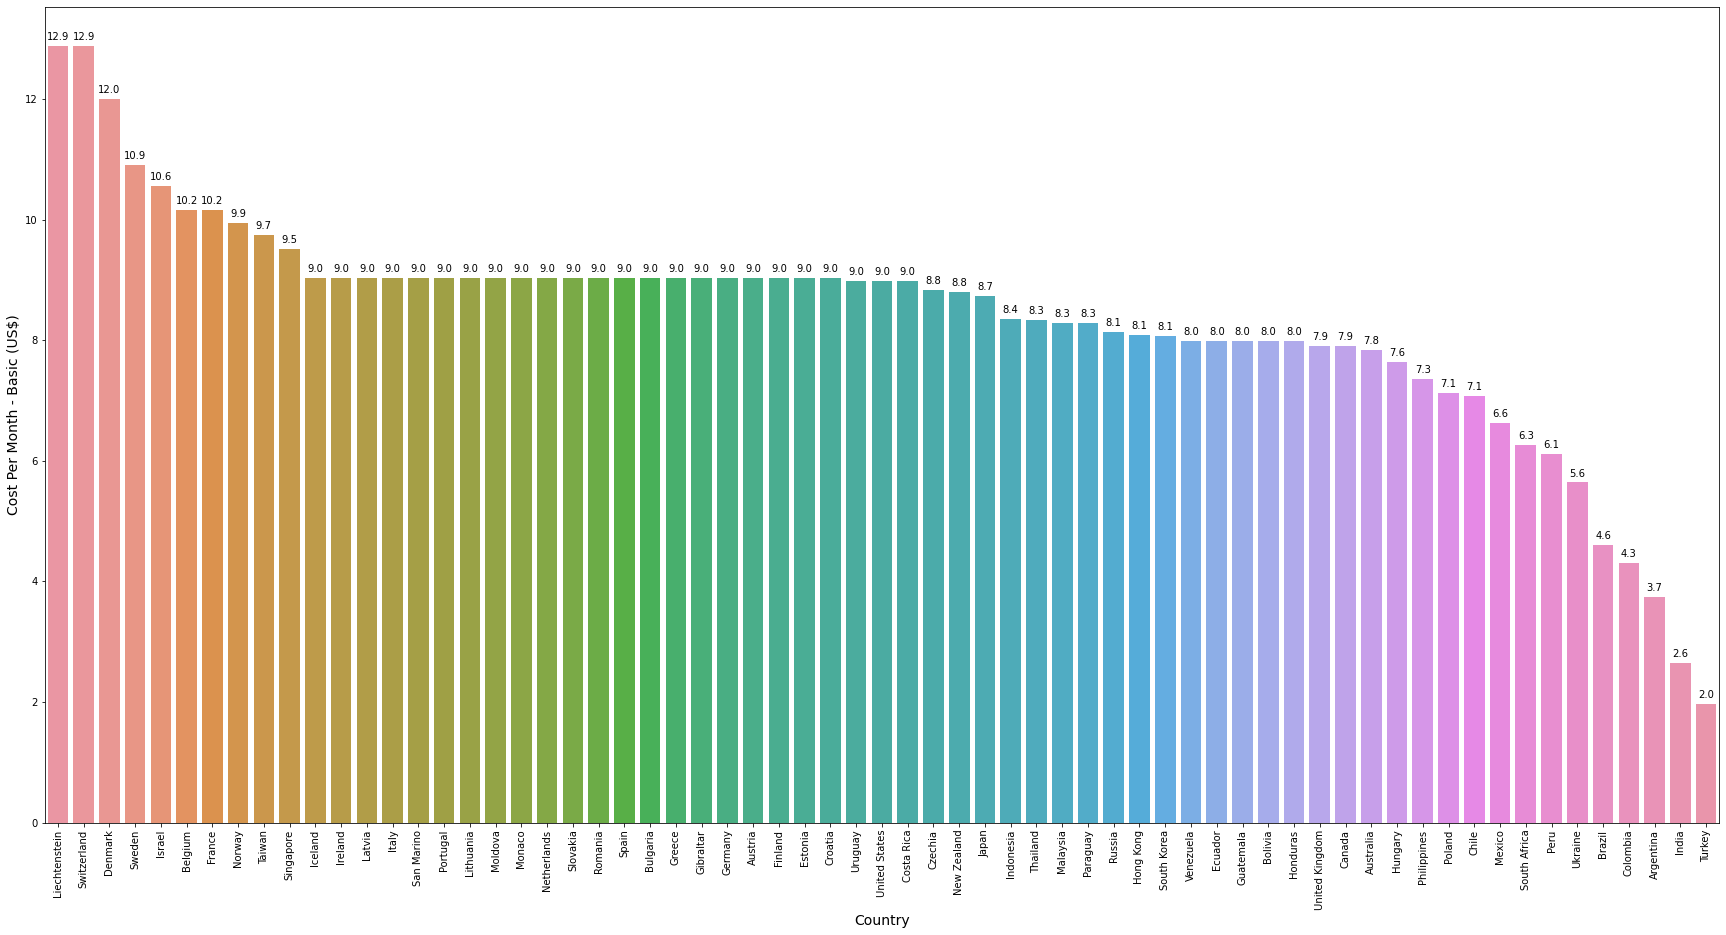

In [75]:
#Plotting the Basic Cost Per Month in Every Country
plt.figure(figsize=(30, 15))
splot=sns.barplot(x="Country",y="Cost Per Month - Basic ($)",data=dataset_net_custos.sort_values(by=['Cost Per Month - Basic ($)'], ascending=False))
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xticks(rotation=90)
plt.xlabel("Country", size=14)
plt.ylabel("Cost Per Month - Basic (US$)", size=14)

**Custo mês por continente - Assinatura Basic**

In [76]:
df_custos_continente_basic = df_custos_continente.groupby("Continent")["Cost Per Month - Basic ($)"].mean().nlargest(10)
df_custos_continente_basic

Continent
Europe           9.285161
Oceania          8.320000
North America    7.900000
Asia             7.305556
South America    6.709000
Africa           6.260000
Name: Cost Per Month - Basic ($), dtype: float64

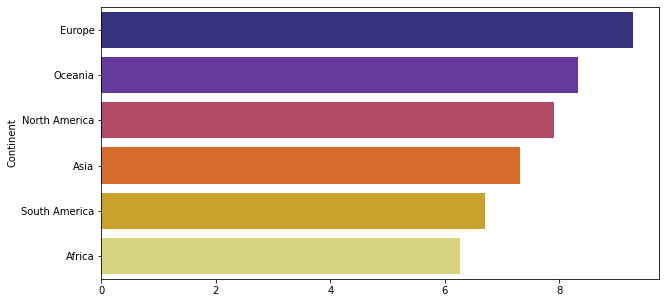

In [77]:
#Plotting the Basic Cost Per Month in Every Continent
sns.barplot(x=df_custos_continente_basic.values, y=df_custos_continente_basic.index,palette="CMRmap")
rcParams['figure.figsize'] = 10,5

**Custo mês por país - Assinatura Standard**

Text(0, 0.5, 'Cost Per Month - Standard (US$)')

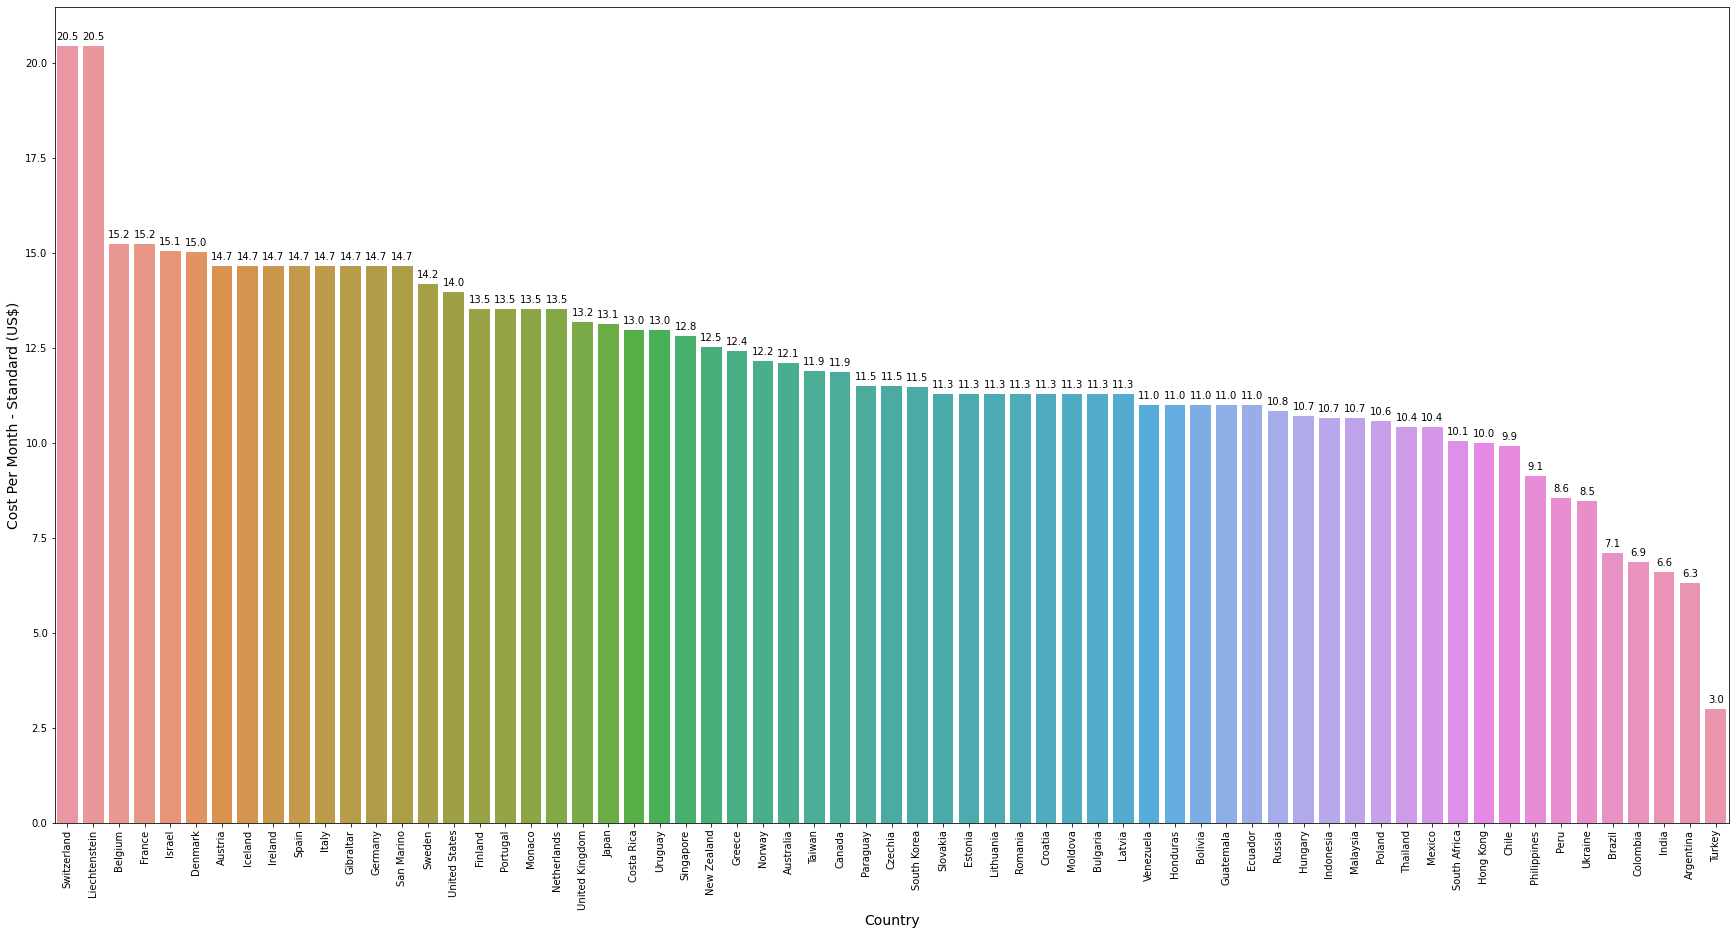

In [78]:
#Plotting the Standard Cost Per Month in Every Country
plt.figure(figsize=(30, 15))
splot=sns.barplot(x="Country",y="Cost Per Month - Standard ($)",data=dataset_net_custos.sort_values(by=['Cost Per Month - Standard ($)'], ascending=False))
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xticks(rotation=90)
plt.xlabel("Country", size=14)
plt.ylabel("Cost Per Month - Standard (US$)", size=14)

**Custo mês por continente - Assinatura Standard**

In [79]:
df_custos_continente_standard = df_custos_continente.groupby("Continent")["Cost Per Month - Standard ($)"].mean().nlargest(10)
df_custos_continente_standard

Continent
Europe           13.398387
Oceania          12.325000
North America    11.454000
Asia             10.164444
Africa           10.050000
South America     9.619000
Name: Cost Per Month - Standard ($), dtype: float64

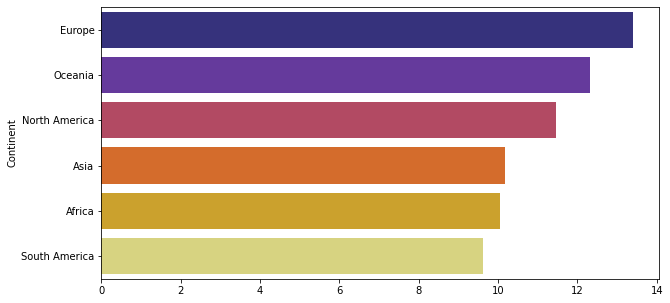

In [80]:
#Plotting the Standard Cost Per Month in Every Continent
sns.barplot(x=df_custos_continente_standard.values, y=df_custos_continente_standard.index,palette="CMRmap")
rcParams['figure.figsize'] = 10,5

**Custo mês por país - Assinatura Premium**

Text(0, 0.5, 'Cost Per Month - Premium (US$)')

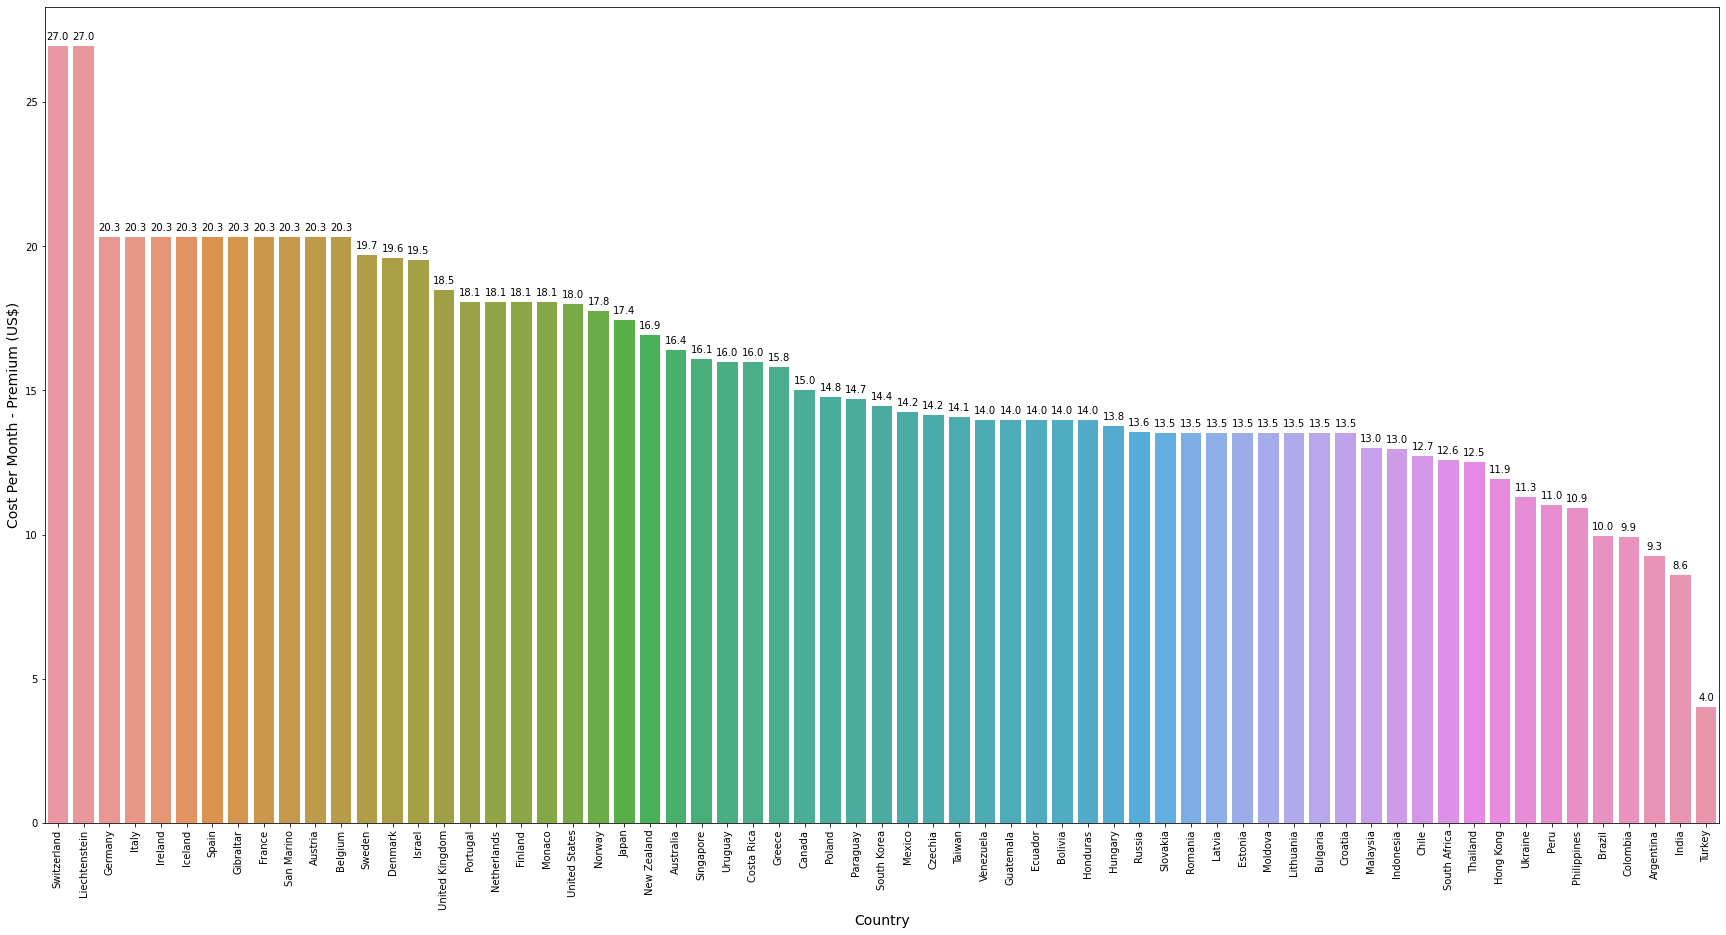

In [81]:
#Plotting the Premium Cost Per Month in Every Country
plt.figure(figsize=(30, 15))
splot=sns.barplot(x="Country",y="Cost Per Month - Premium ($)",data=dataset_net_custos.sort_values(by=['Cost Per Month - Premium ($)'], ascending=False))
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xticks(rotation=90)
plt.xlabel("Country", size=14)
plt.ylabel("Cost Per Month - Premium (US$)", size=14)

**Custo mês por continente - Assinatura Premium**

In [82]:
df_custos_continente_premium = df_custos_continente.groupby("Continent")["Cost Per Month - Premium ($)"].mean().nlargest(10)
df_custos_continente_premium

Continent
Europe           17.694194
Oceania          16.665000
North America    14.648000
Asia             12.794444
Africa           12.580000
South America    12.555000
Name: Cost Per Month - Premium ($), dtype: float64

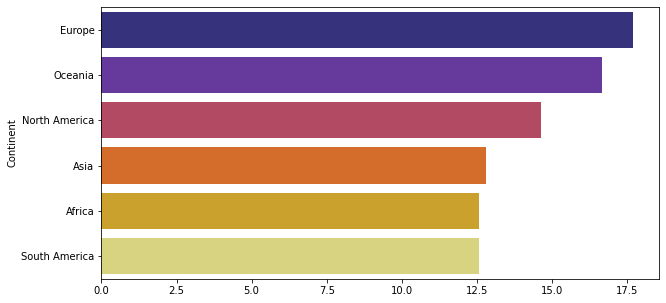

In [83]:
#Plotting the Premium Cost Per Month in Every Continent
sns.barplot(x=df_custos_continente_premium.values, y=df_custos_continente_premium.index,palette="CMRmap")
rcParams['figure.figsize'] = 10,5